<a href="https://colab.research.google.com/github/Kevindsds/Note/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note for learning Pytorch in https://www.learnpytorch.io

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import random

# 00.Pytorch Fundamentals

Some note in this part is written in Notability(iPad)

## Reshaping, stacking, squeezing and unsqueezing

In [ ]:
tensor = torch.rand(2, 3)
tensor

tensor([[0.6394, 0.6393, 0.9879],
        [0.1512, 0.8564, 0.9425]])

1. torch.reshape(input, shape) \
Explain: For a existing tensor, we can change the shape of it. Don't change the elements of it. And the new shape must be available for the tensor.

In [ ]:
tensor_1 = tensor.reshape(1, 6)
tensor_2 = tensor.reshape(3, 2)
tensor_1
tensor_2

tensor([[0.6394, 0.6393, 0.9879, 0.1512, 0.8564, 0.9425]])

2. torch.Tensor.view(shape) \
Explain: The function of it is almost the same as torch.reshape. The difference of them is that change the value of the elements in it also change the value of the original tensor.

In [ ]:
tensor_3 = tensor.view(1, 3, 2)
print(tensor_3)


tensor([[[0.6394, 0.6393],
         [0.9879, 0.1512],
         [0.8564, 0.9425]]])


In [ ]:
tensor_3[:, 0, 1] = 5
tensor_3, tensor

(tensor([[[0.6394, 5.0000],
          [0.9879, 0.1512],
          [0.8564, 0.9425]]]),
 tensor([[0.6394, 5.0000, 0.9879],
         [0.1512, 0.8564, 0.9425]]))

3. torch.stack(input, dim=) \
Explain: It can stack many same tensor together. The function of "dim=" is where the tensor repeat.

In [ ]:
a = torch.rand([1, 5])
print(a)
b = torch.stack([a, a, a], dim=0)
print(b)
c = torch.stack([a, a, a], dim=1)
print(c)

tensor([[0.0341, 0.4563, 0.3564, 0.3055, 0.0830]])
tensor([[[0.0341, 0.4563, 0.3564, 0.3055, 0.0830]],

        [[0.0341, 0.4563, 0.3564, 0.3055, 0.0830]],

        [[0.0341, 0.4563, 0.3564, 0.3055, 0.0830]]])
tensor([[[0.0341, 0.4563, 0.3564, 0.3055, 0.0830],
         [0.0341, 0.4563, 0.3564, 0.3055, 0.0830],
         [0.0341, 0.4563, 0.3564, 0.3055, 0.0830]]])


4. torch.squeeze(input) \
Explain: remove all dimenions with value 1.

In [ ]:
a = torch.rand([1, 1, 5, 1])
print(a.shape)
b = torch.squeeze(a)
print(b.shape)

torch.Size([1, 1, 5, 1])
torch.Size([5])


5. torch.unsqueeze(input, dim=) \
Explain: add dimenion of 1 in the location of "dim=".

In [ ]:
a = torch.rand([5])
print(a.shape)
b = torch.unsqueeze(a, dim=0)
print(b.shape)

torch.Size([5])
torch.Size([1, 5])


6. torch.permute(input, dims) \
Explain: It can change the order of dimenions of a tensor by using the index.

In [ ]:
a = torch.rand([1, 2, 3, 4])
print(a.shape)
b = a.permute(2, 1, 0, 3)
print(b.shape)

torch.Size([1, 2, 3, 4])
torch.Size([3, 2, 1, 4])


## Other small section

1. indexing \
Just like normal Python index.

In [ ]:
# Example
a = torch.rand([1, 3, 3])
print(a.shape)
print(a[:, 0])
print(a[:, 0, 1])

torch.Size([1, 3, 3])
tensor([[0.8725, 0.0416, 0.7346]])
tensor([0.0416])


2. Transfer between Pytorch tensors and NumPy \
If I want data with a specific dtype, I can firstly transfer them, and then change their type. \
Tip: Change the value of original one will not change the value of transferred one. 

In [ ]:
array = np.arange(1, 8)
tensor = torch.arange(2, 9)
# transfer from array to tensor
new_tensor = torch.from_numpy(array)
print(new_tensor, new_tensor.dtype)
# trannsfer from tensor to array
new_array = tensor.numpy()
print(new_array, new_array.dtype)

tensor([1., 2., 3., 4., 5., 6., 7.]) torch.float32
[2 3 4 5 6 7 8] int64


3. Reproducibility (torcg.manual_seed(seed=)) \
It can let we can always pick the same number when we random pick number.


In [ ]:
a = torch.rand(2, 3)
b = torch.rand(2, 3)
print(a)
print(b)

tensor([[0.4525, 0.6317, 0.4760],
        [0.2200, 0.2166, 0.2571]])
tensor([[0.0458, 0.1755, 0.6177],
        [0.8291, 0.5246, 0.2708]])


In [ ]:
torch.manual_seed(10)
a = torch.rand(2, 3)
torch.manual_seed(10)
b = torch.rand(2, 3)
print(a)
print(b)

tensor([[0.4581, 0.4829, 0.3125],
        [0.6150, 0.2139, 0.4118]])
tensor([[0.4581, 0.4829, 0.3125],
        [0.6150, 0.2139, 0.4118]])


3. running tensors on GPUs/CPUs
the index of cuda also start at 0.

In [ ]:
# Check GPU
!nvidia-smi
# Another way
torch.cuda.is_available()

/bin/bash: nvidia-smi: command not found


False

In [ ]:
# Set device type (cuda means gpu)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# count number of devices
print(torch.cuda.device_count)


cpu


In [ ]:
# If we have a gpu.
tensor = torch.tensor([1, 2, 3])
print(tensor, tensor.device)
# putting data/models on the GPU(device = 'cuda')
tensor_gpu = tensor.to(device)
# move back to cpu
tensor_back = tensor_gpu.cpu().numpy()
# operation above just a copy of the tensor on GPU, so the original tensor is still on GPU right now.

# 01.PyTorch Workflow Fundamentals

For create a model, there is a standard Pytorch workflow. \
1. Get data ready(transfer what you have to data)
2. build or pick a pretrained model(suit my problem)(pick a loss function and optimizer; build a training loop)
3. fit the model to the data and make a prediction 
4. evaluate the model
5. improve through experimentation
6. save and reload the trained model


## 1. Data (preparing and loading)

For this practice, we just create some data

In [ ]:
# create data
weight = 0.9
bias = 0.2

start = 0 
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias
print(x[:10])
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.2000],
        [0.2180],
        [0.2360],
        [0.2540],
        [0.2720],
        [0.2900],
        [0.3080],
        [0.3260],
        [0.3440],
        [0.3620]])


When we have data, we always use 80% data as training set; 10% as validation set; 10% as testing set.

In [ ]:
split_point = int(len(x) * 0.8)
x_training, y_training = x[:split_point], y[:split_point]
x_testing, y_testing = x[split_point:], y[split_point:]

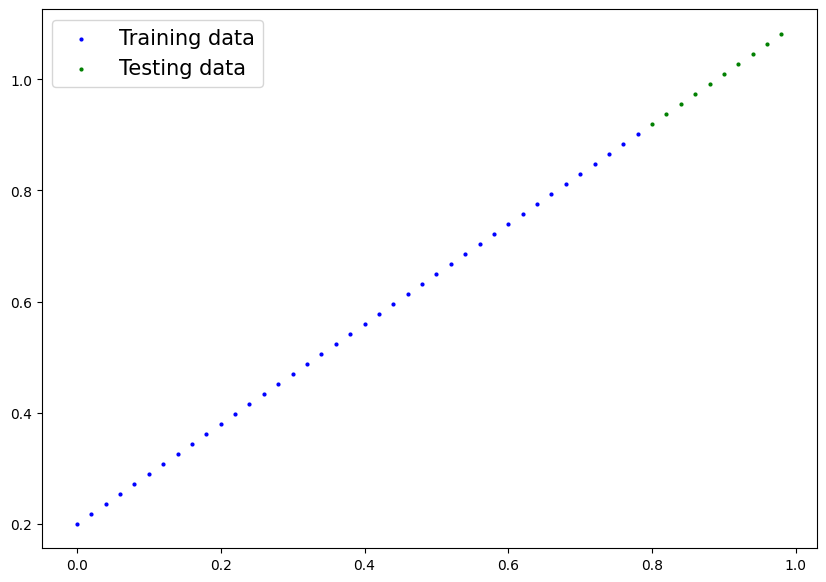

In [ ]:
# visualize these data
def plot_visualize(train_data = x_training,
                   train_label = y_training,
                   test_data = x_testing,
                   test_label = y_testing,
                   prediction = None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_label, s = 4, c = 'b', label = 'Training data')
  plt.scatter(test_data, test_label, s = 4, c = 'g', label = 'Testing data')
  if prediction is not None:
    plt.scatter(test_data, prediction, s = 4, c = 'r', label = 'Prediction data')
  
  # Show the legend
  plt.legend(prop = {"size":15})

plot_visualize()

## 2. Create a model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad = True))

  def forward(self, data:torch.tensor) -> torch.tensor:
    label = self.weights * data + self.bias
    return label

Above is a Pytorch model, it has four essential factors. \
1. torch.nn: contain all of the building blacks for computational graphs
2. torch.nn.Parameter: stores tensors that can be used with nn.Module. If required_grad=True, the parameter can change automaticlly.
3. torch.nn.Module: the basic class for all neural network modules. It need forword() to implement it.
4. torch.optim: contain various optimize algorithms(these tell the model parameter how to best change to improve gradient descent)
5. def forward(): all nn.nodule subclass need this function to implement.


In [ ]:
# check the contain of this module
torch.manual_seed(42)
model_0 = LinearRegressionModel()
#this might be a function of nn.module
print(list(model_0.parameters()))
# see what the model contains
model_0.state_dict()

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Now, the weights and bias is random, we can just use this data to try to predict the model.

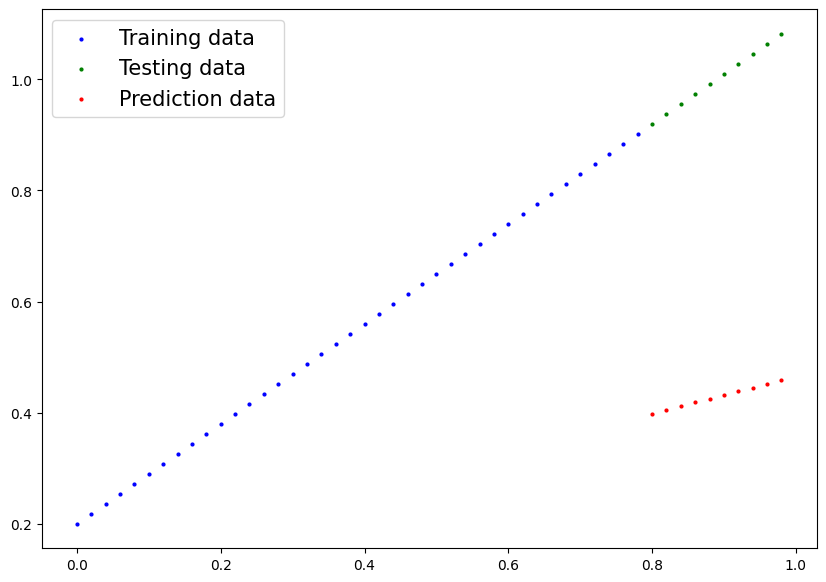

In [ ]:
# this is essential when you want to make orediction
# 'with' means context of sth.
# by torch.inference_mode, it turns off a bunch of things, e.g. grandient tracking, it's a mode just for inference
with torch.inference_mode():
  y_preds = model_0(x_testing)

plot_visualize(prediction=y_preds)

## 3. Train Model